<a href="https://colab.research.google.com/github/Praneet-Prabhanjan/Food_case_study/blob/main/Replicate_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from patsy import dmatrices


In [ ]:
#To read CSV files with the help of pandas
data_1 = pd.read_csv("mcdonalds.csv")

#Simple tolist function to convert the coloumns into list
data_1.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [ ]:
#To fetch the dimesnions of the entire CSV file including rows(1453) and coloumns (15)
data_1.shape

(1453, 15)

In [ ]:
#Gives output of 5 initial rows
data_1.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [ ]:
#Gives output of last 5 rows
data_1.tail(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [ ]:
#Replacing "Yes" with 1 and "No" with 0 for the first 11 coloumns using iloc (pandas) function
MD=data_1.iloc[:,0:11].replace("Yes",1).replace("No",0)

#Calculating the mean for each column and values rounded to two decimal places.
mean=round(MD.mean(),2)

#Mean values are stored in MD variable
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [ ]:
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [ ]:
#Performing principal component analysis to reduce the dimensionality  (Another way of exploring data)
pca = PCA()
MD_pca=pca.fit_transform(MD)  #Fit and transform the data using PCA
MD_p=pca.fit(MD)

#Calculate the standard deviation of the principal components
SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]    #creating an empty index
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

#Create a DataFrame to display the results
sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [ ]:
#Outputs the standard deviation of each principal component
print("Standard Deviation:\n", SD.round(1))
load = pca.components_
rot_matrix = MD_p.components_.T

# Create a DataFrame for the rotation matrix
rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)

# Round the rotation matrix to three decimal places
rot_df = round(-rot_df, 3)

print(rot_df)

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304 -0.055  0.308 -0.171  0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063  0.142 -0.278  0.348  0.060  0.113  0.018   
spicy       0.006 -0.019  0.037 -0.198 -0.071  0.355 -0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322  0.354  0.073  0.407  0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802 -0.254 -0.361 -0.209 -0.036  0.138  0.003   
fast        0.108  0.087  0.065  0.097 -0.108  0.595  0.087  0.628 -0.166   
cheap       0.337  0.611  0.149 -0.119  0.129  0.103  0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287  0.003  0.211  0.077 -0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024 -0.068  0.003  0.261  0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192 -0.763 -0.288  0.178  0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089 -0.370  0.729  0.211  0.027  0.167  0.072   

        

In [ ]:
rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


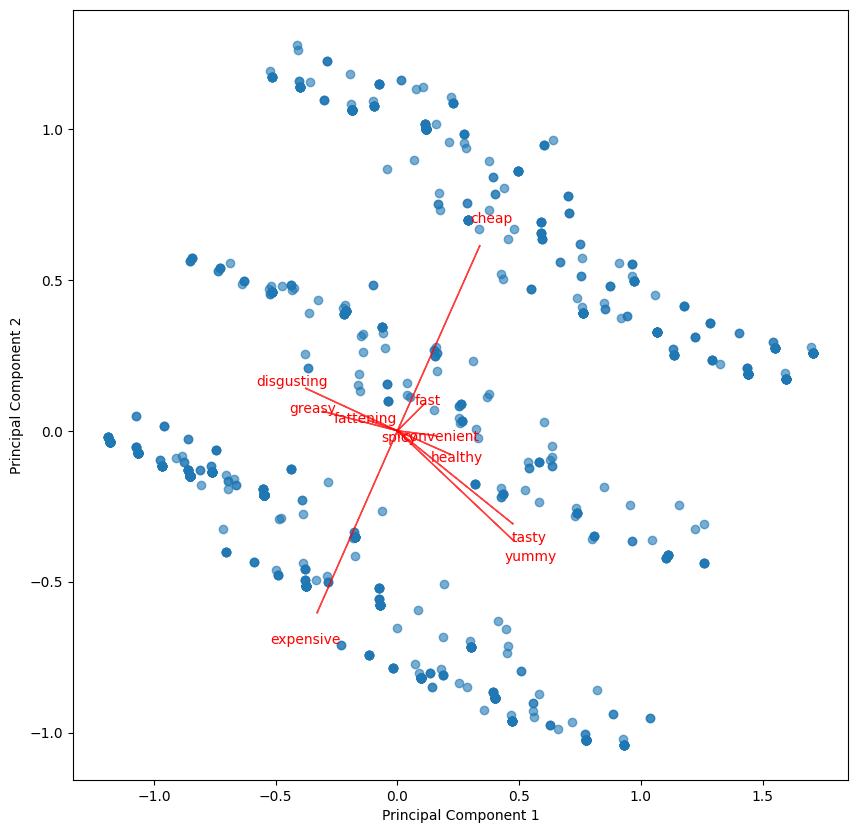

In [ ]:
#create the plot
plt.figure(figsize=(10, 10))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], alpha=0.6)

for i, var in enumerate(rot_df.index):
    plt.arrow(0, 0, rot_df.loc[var, 'PC1'], rot_df.loc[var, 'PC2'], color='r', alpha=0.7)
    plt.text(rot_df.loc[var, 'PC1']*1.15, rot_df.loc[var, 'PC2']*1.15, var, color='r', ha='center', va='center')

# Set axis labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

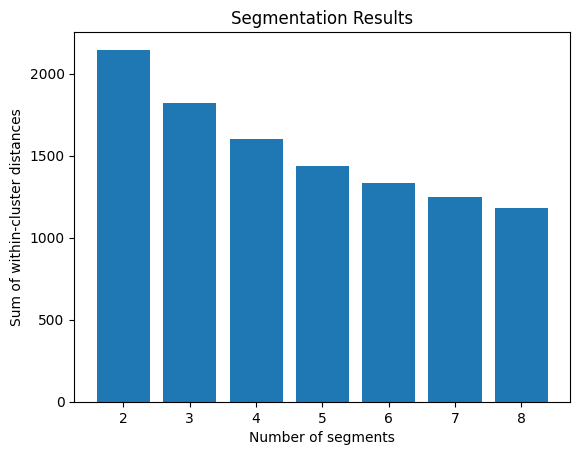

In [ ]:
np.random.seed(1234)

# Number of repetitions for K-means clustering
nrep = 10

# Range of cluster numbers to try
num_segments = range(2, 9)   #We calculate solutions for two to eight market segments

# Empty List to store the sum of within-cluster distances for each number of clusters
within_cluster_distances = []

# Dictionary to store K-means models for each number of clusters
MD_km28 = {}

# Perform K-means clustering for each number of clusters and store the results
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

# Visualize the sum of within-cluster distances for each number of clusters
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


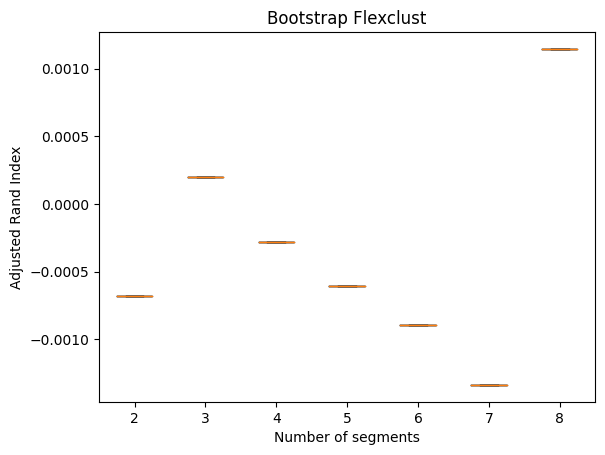

In [ ]:
np.random.seed(1234)

# Number of bootstrap samples
nboot = 100

# Number of repetitions for K-means clustering
nrep = 10

# List to store the bootstrap samples
bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []

# Range of cluster segments
num_segments = range(2, 9)

for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  # Perform K-means clustering on the bootstrap sample with a given number of clusters
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)   # Calculate the Adjusted Rand Index between the true and predicted cluster labels
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

K-means model for 1 clusters not found in MD_km28 dictionary.


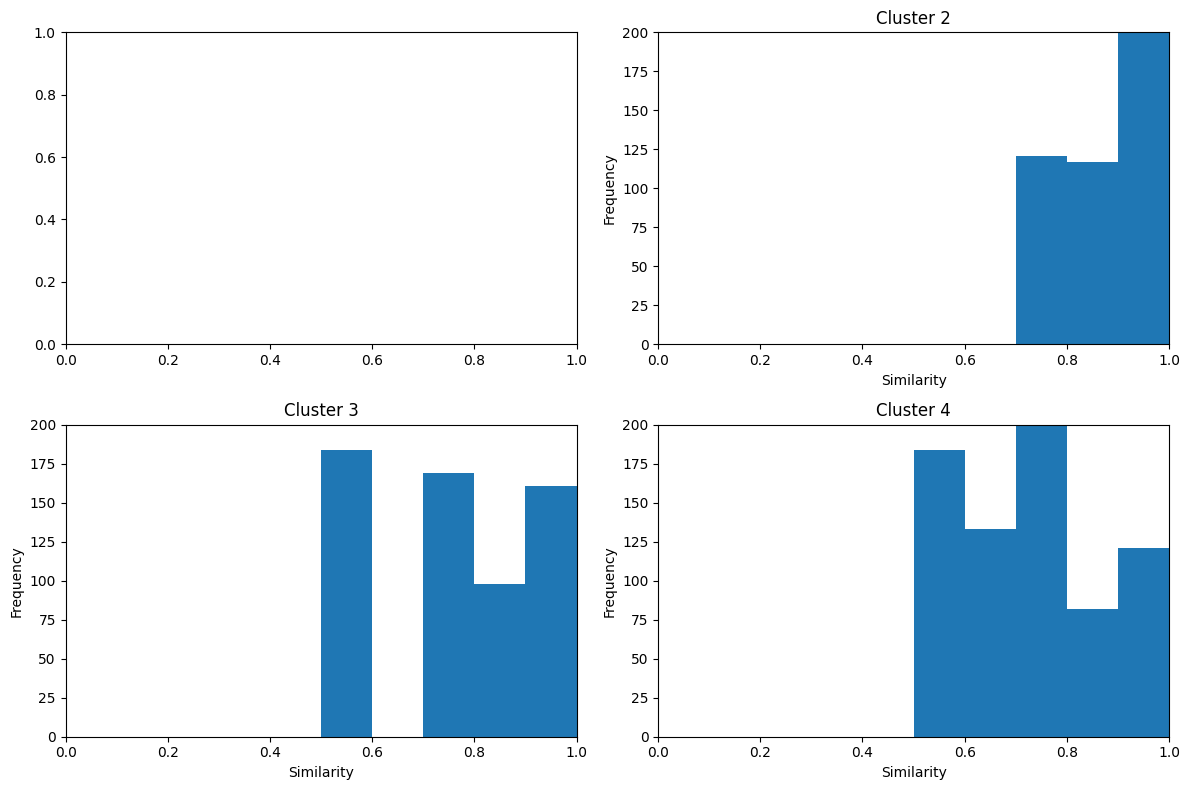

In [ ]:
range_values = (0,1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize= (12,8) )

for i in range(1,5):
   key = str(i)
   if key not in MD_km28:
    print(f"K-means model for {i} clusters not found in MD_km28 dictionary.")
    continue

   labels = MD_km28[str(i)].predict(MD)
   similarities = MD_km28[str(i)].transform(MD).min(axis=1)
   row = (i - 1) // 2
   col = (i - 1) % 2

# Plot the histogram for the i-th clustering result in the corresponding subplot
   axs[row, col].hist(similarities, bins=num_bins, range=range_values)
   axs[row, col].set_xlabel('Similarity')
   axs[row, col].set_ylabel('Frequency')
   axs[row, col].set_title('Cluster {}'.format(i))

    # Set the x-axis and y-axis limits for the histogram
   axs[row, col].set_xlim(range_values)
   axs[row, col].set_ylim(0, max_frequency)

    # Set the x-axis ticks for the histogram
   axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjust the layout of the subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


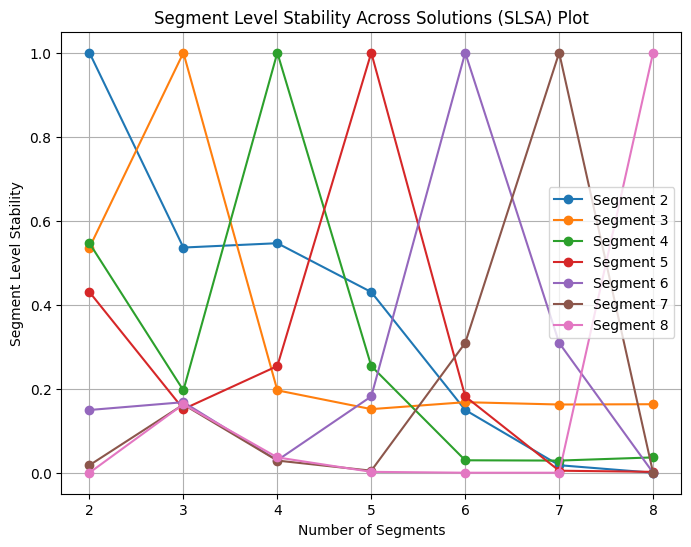

In [ ]:
#Numbers of segments (clusters) to consider for K-means clustering
num_segments = range(2, 9)

segment_stability = []

# Loop through each number of segments in the defined range (2 to 8)
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

#Creates a new figure for the plot with size (8 inches width and 6 inches height)
plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()


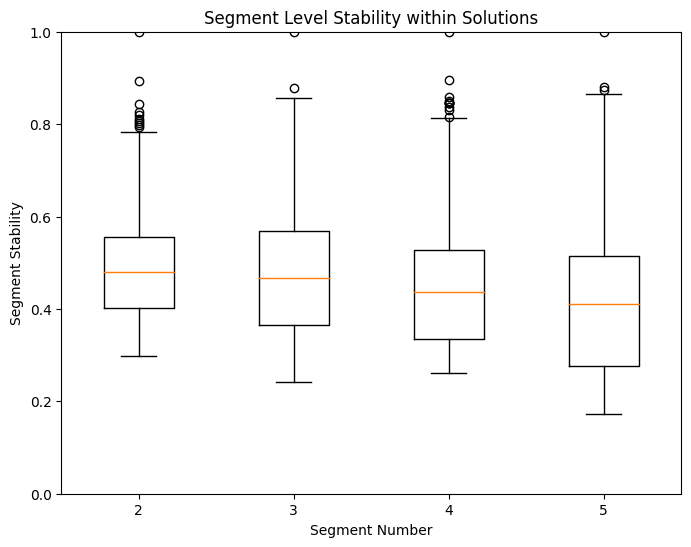

In [ ]:
# Define a list of segment solutions (number of clusters) to consider for analysis
segment_solutions = ["2", "3", "4", "5"]

# Create dictionaries to store the cluster labels
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    # Obtain the cluster labels (segments) for the current segment solution using the K-means model
    segment_labels[segment] = MD_km28[segment].predict(MD)

    # The similarity is calculated as the minimum distance of each data point to the centroid of its assigned cluster
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

# empty list to store normalized segment stability values
segment_stability_values = []

for segment in segment_solutions:
    # Get the similarity values for the current segment solution
    similarities = segment_similarities[segment]

    # Normalize the similarity values by dividing them by the maximum similarity value in the solution
    # This normalization scales the similarity values to the range [0, 1], making them comparable across solutions
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

# Create a box plot to visualize
plt.figure(figsize=(8, 6))

# Plot the box plot with the segment_stability_values list
# The whis parameter controls the range of the whiskers on the box plot
# If whis=1.5, the whiskers extend to the data points within 1.5 times the interquartile range (IQR)
plt.boxplot(segment_stability_values, whis=1.5)


plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)

# Set the y-axis limits to [0, 1] to ensure the stability values are within this range
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
#plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import entropy

# Set the random seed for reproducibility
np.random.seed(1234)

# Define the range of K values (number of clusters) to consider for K-means clustering
k_values = range(2, 9)

# Initialize an empty list to store the evaluation metrics for each K-means clustering result
MD_m28 = []

# Loop through each K value
for k in k_values:
    # Create a K-means model with the current K value and fit it to the MD dataset
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)

    # Obtain the iteration count for convergence
    iter_val = model.n_iter_

    # Check if the model converged during the specified maximum number of iterations
    converged = True if iter_val < model.max_iter else False

    # Store the current K value in two variables for later use
    k_val = k
    k0_val = k

    # Calculate the log-likelihood for the current K-means clustering result
    log_likelihood = -model.inertia_

    # Get the number of samples and features in the MD dataset
    n_samples, _ = MD.shape

    # Calculate the Akaike Information Criterion (AIC) for the current clustering result
    aic = -2 * log_likelihood + 2 * k

    # Calculate the Bayesian Information Criterion (BIC) for the current clustering result
    bic = -2 * log_likelihood + np.log(n_samples) * k

    # Get the cluster labels for each data point in the MD dataset
    labels = model.labels_

    # Count the number of occurrences of each cluster label
    counts = np.bincount(labels)

    # Calculate the probabilities of each cluster label occurrence
    probs = counts / float(counts.sum())

    # Calculate the entropy (a measure of uncertainty) of the cluster label distribution
    class_entropy = entropy(probs)

    # Calculate the Integrated Completed Likelihood (ICL) using the BIC and class entropy
    icl = bic - class_entropy

    # Append the evaluation metrics for the current K-means clustering result to the MD_m28 list
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Convert the list of evaluation metrics to a DataFrame with appropriate column names
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Print the DataFrame containing the evaluation metrics for each K-means clustering result
print(MD_m28)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


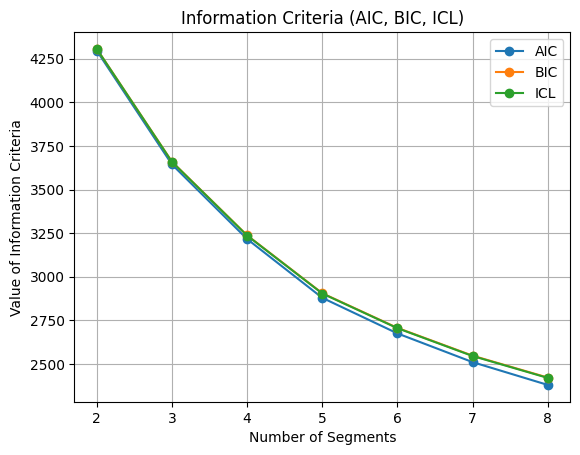

In [ ]:
# Extract the number of segments (K values) from the MD_m28 DataFrame
num_segments = MD_m28["k"]

# Extract the AIC, BIC, and ICL values from the MD_m28 DataFrame
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

# Create a line plot to visualize the values of AIC, BIC, and ICL across different numbers of segments
plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

# Set the label for the x-axis
plt.xlabel('Number of Segments')

# Set the label for the y-axis
plt.ylabel('Value of Information Criteria')

# Set the title for the plot
plt.title('Information Criteria (AIC, BIC, ICL)')

# Display the legend to label the lines representing each information criterion
plt.legend()

# Display the grid in the plot to aid visualization
plt.grid(True)

# Display the line plot
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture

# Set the number of clusters (K) for the initial K-means clustering
k = 4

# Perform K-means clustering on the MD dataset with the specified number of clusters
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

# Perform Gaussian Mixture Model clustering on the MD dataset with the specified number of components (clusters)
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

# Create a DataFrame to store the cluster assignments from both K-means and GMM
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Filter the MD dataset to include only the points belonging to a specific cluster obtained from GMM
MD_m4 = MD[results['mixture'] == 3]

# Perform K-means clustering specifically for the points belonging to the filtered cluster (mixture=3)
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

# Create a DataFrame to store the cluster assignments for the filtered cluster obtained from GMM
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Print the cross-tabulation (contingency table) of cluster assignments between K-means and GMM
print(pd.crosstab(results['kmeans'], results['mixture']))

# Print the cross-tabulation (contingency table) of cluster assignments for the filtered cluster using K-means
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Create a Gaussian Mixture Model (GMM) with 4 components and fit it to the MD dataset
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

# Calculate the log-likelihood of the GMM model for the MD dataset
log_likelihood_m4a = gmm_m4a.score(MD)

# Create another GMM with 4 components and fit it to the MD dataset
gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

# Calculate the log-likelihood of the second GMM model for the MD dataset
log_likelihood_m4 = gmm_m4.score(MD)

# Print the log-likelihood values
print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)


Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


In [ ]:
# Perform value counts for the 'Like' column in the 'data' DataFrame
like_counts = pd.value_counts(data_1['Like'])

# Reverse the order of the counts
reversed_counts = like_counts.iloc[::-1] #slicing operation
print(reversed_counts)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: Like, dtype: int64


In [ ]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

# Create a new column 'Like.n' in the 'data' DataFrame by mapping the 'Like' column to the numeric codes
data_1['Like.n'] = data_1['Like'].map(like_mapping)

# Perform value counts for the 'Like.n' column to count occurrences of each numeric code
like_n_counts = data_1['Like.n'].value_counts()

# Print the value counts of each numeric code in the 'Like.n' column
print(like_n_counts)


 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [ ]:
#from patsy import dmatrices

independent_vars = data_1.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data_1)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]
